In [ ]:
# introduction to machine learning
# Algorithms, Models that help computer to learn and Predict
# # Applications of machine learning

 #  1. supervised learning: dataset that is labelled, predict, linear regression,
  # decision tree, support vector machine, neural networks(supervised learning algorithm)
   #2. Unsupervised learning: deals with unlabeled data, clustering algorithms to group data together,
   #k-means clustering, hierarchical clustering, PCA(principal component analysis)
   #3.Reinforcement Learning:
   
   # Problem formulation!
   #1.Define the problem! Classification task, regression analysis, clustering, anomaly detction recommendations.
   #2.Gather the data.
   #3.Split the data.
   #20, 80
%matplotlib inline
 
# data


In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, csv file
import matplotlib.pyplot as plt  # plotting and data visualization
import seaborn as sns # statistical data visualization

# ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd 
data=pd.read_csv("heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
# cp=chest pain
# tresbps=resting blood pressure
# ca=number of major
# target= have heart disease or not
# thal=normal, fexied defect, reversible defect

In [8]:
# show number of people with heart disesase
# column target
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
# show percentage of male and female
count_male=len(data[data.sex==0])
count_female=len(data[data.sex==1])


total_count = count_male + count_female
percentage_male = (count_male / total_count) * 100
percentage_female = (count_female / total_count) * 100

print("Percentage of male patients: {:.2f}%".format(percentage_male))
print("Percentage of female patients: {:.2f}%".format(percentage_female))

Percentage of male patients: 30.44%
Percentage of female patients: 69.56%


In [9]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


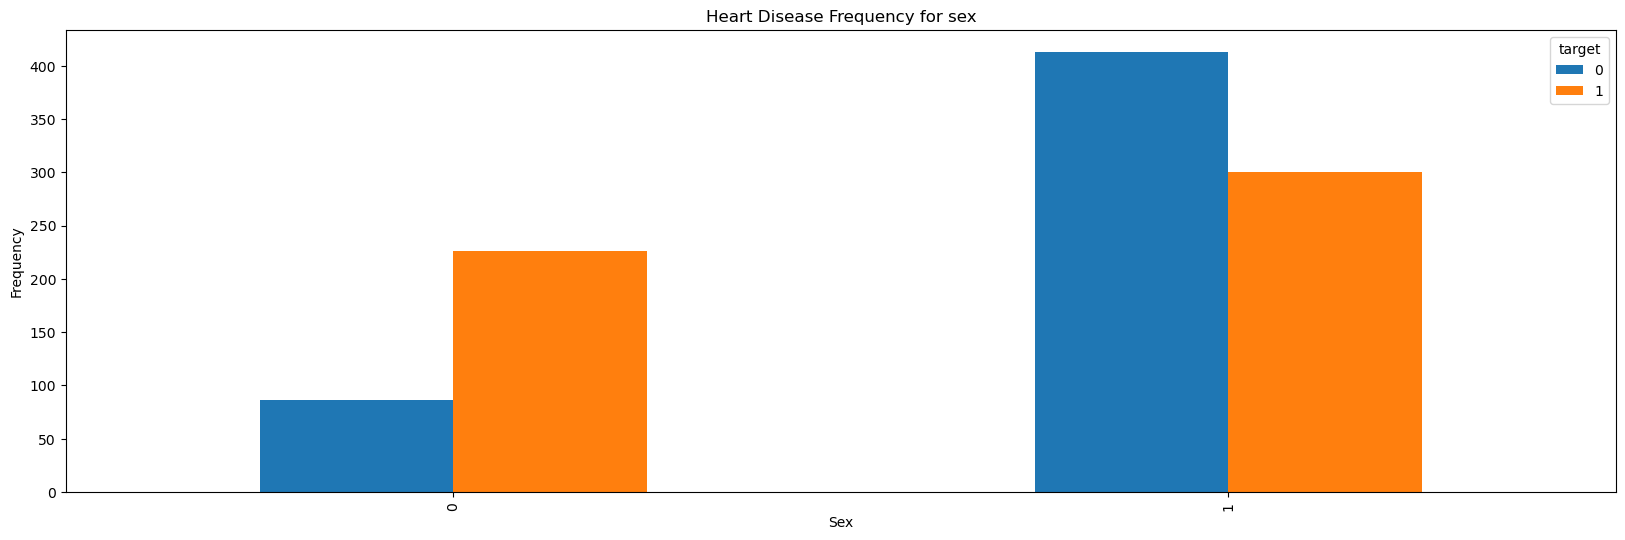

In [33]:
# barplot showing heart disease frequency of age
pd.crosstab(data.sex,data.target).plot(kind='bar', figsize=(20,6))
plt.title('Heart Disease Frequency for sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

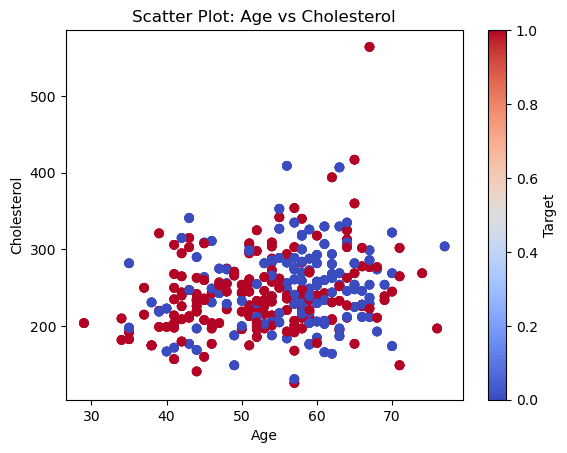

In [38]:
age = data['age']
chol = data['chol']

# Create scatter plot
plt.scatter(age, chol, c=data['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [39]:
# working with ML model accuracy of different ML more
# create model for logistic regression
# solve problems based on classification. create independent variables and dependent variable
# decision trees

In [22]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
# creating a model for logistic regression
y=data.target.values
x_data=data.drop(columns=['target'])

In [25]:
# split data for train(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)


In [33]:
X_train.shape, X_test.shape

((820, 13), (205, 13))

In [34]:
X_train.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
835   49    1   2       118   149    0        0      126      0      0.8   
137   64    0   0       180   325    0        1      154      1      0.0   
534   54    0   2       108   267    0        0      167      0      0.0   
495   59    1   0       135   234    0        1      161      0      0.5   
244   51    1   2       125   245    1        0      166      0      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
700   41    1   2       130   214    0        0      168      0      2.0   
71    61    1   0       140   207    0        0      138      1      1.9   
106   51    1   0       140   299    0        1      173      1      1.6   
270   43    1   0       110   211    0        1      161      0      0.0   
860   52    1   0       112   230    0        1      160      0      0.0   

     slope  ca  thal  
835      2   3     2  
137      2 

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score with gini index:{0:0.4f}'. format(accuracy))

Model accuracy score with gini index:0.9854


In [39]:
 # Make predictions on the test data
y_pred = clf.predict(X_train)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [42]:
# print training set of accuracy score
print('Training-set accuracy score: {0:0.4f}'.format(clf.score(X_train, y_train)))
print('Testing-set accuracy score: {0:0.4f}'.format(clf.score(X_test, y_test)))

Training-set accuracy score: 1.0000
Testing-set accuracy score: 0.9854


[Text(0.5338983050847458, 0.9545454545454546, 'X[2] <= 0.5\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.2902542372881356, 0.8636363636363636, 'X[11] <= 0.5\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.1906779661016949, 0.7727272727272727, 'X[12] <= 2.5\ngini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.09322033898305085, 0.6818181818181818, 'X[8] <= 0.5\ngini = 0.354\nsamples = 100\nvalue = [23, 77]'),
 Text(0.03389830508474576, 0.5909090909090909, 'X[7] <= 96.5\ngini = 0.146\nsamples = 63\nvalue = [5, 58]'),
 Text(0.01694915254237288, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05084745762711865, 0.5, 'X[4] <= 316.5\ngini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(0.03389830508474576, 0.4090909090909091, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.06779661016949153, 0.4090909090909091, 'X[4] <= 362.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.05084745762711865, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = 

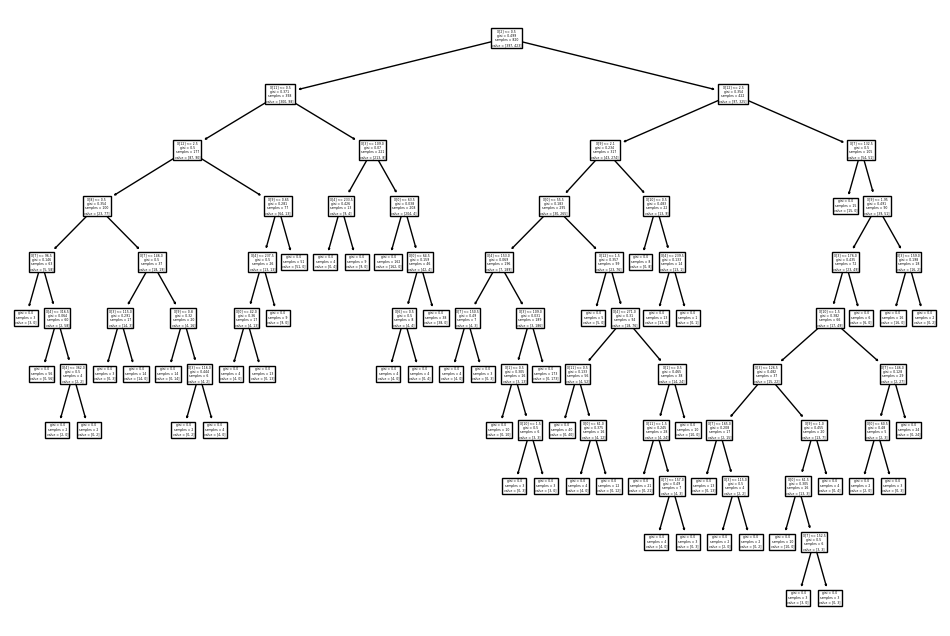

In [45]:
# 1st way to visualize decision tree leaf node  
plt.figure(figsize=(12,8)) # create figure for width and height
from sklearn import tree
tree.plot_tree(clf.fit(X_train,y_train))